In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 [==============================] - 3s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [5]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#9): Which is digit '4'


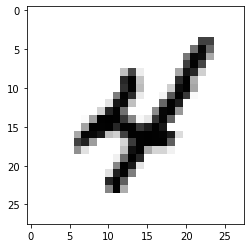

In [6]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [7]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

adam_acc=h.history['accuracy']
adam_val_acc=h.history['val_accuracy']

adam_loss=h.history['loss']
adam_val_loss=h.history['val_loss']



Epoch 1/5
657/657 [==============================] - 8s 9ms/step - loss: 0.0133 - accuracy: 0.9966 - val_loss: 0.1657 - val_accuracy: 0.9756
Epoch 2/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.1993 - val_accuracy: 0.9717
Epoch 3/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.1707 - val_accuracy: 0.9750
Epoch 4/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.1853 - val_accuracy: 0.9741
Epoch 5/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1805 - val_accuracy: 0.9740


In [46]:
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

sgd_acc=h.history['accuracy']
sgd_val_acc=h.history['val_accuracy']

sgd_loss=h.history['loss']
sgd_val_loss=h.history['val_loss']


Epoch 1/5
657/657 [==============================] - 6s 8ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.1752 - val_accuracy: 0.9753
Epoch 2/5
657/657 [==============================] - 5s 7ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.1717 - val_accuracy: 0.9761
Epoch 3/5
657/657 [==============================] - 4s 7ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.1692 - val_accuracy: 0.9761
Epoch 4/5
657/657 [==============================] - 4s 7ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.1674 - val_accuracy: 0.9763
Epoch 5/5
657/657 [==============================] - 4s 7ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.1659 - val_accuracy: 0.9766


In [47]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer=RMSprop(), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

rms_acc=h.history['accuracy']
rms_val_acc=h.history['val_accuracy']

rms_loss=h.history['loss']
rms_val_loss=h.history['val_loss']


Epoch 1/5
657/657 [==============================] - 7s 8ms/step - loss: 9.0622e-04 - accuracy: 0.9997 - val_loss: 0.1615 - val_accuracy: 0.9793
Epoch 2/5
657/657 [==============================] - 5s 8ms/step - loss: 4.6548e-05 - accuracy: 1.0000 - val_loss: 0.1647 - val_accuracy: 0.9789
Epoch 3/5
657/657 [==============================] - 5s 8ms/step - loss: 1.8244e-05 - accuracy: 1.0000 - val_loss: 0.1655 - val_accuracy: 0.9795
Epoch 4/5
657/657 [==============================] - 5s 8ms/step - loss: 8.5174e-06 - accuracy: 1.0000 - val_loss: 0.1658 - val_accuracy: 0.9794
Epoch 5/5
657/657 [==============================] - 5s 8ms/step - loss: 6.7526e-06 - accuracy: 1.0000 - val_loss: 0.1667 - val_accuracy: 0.9796


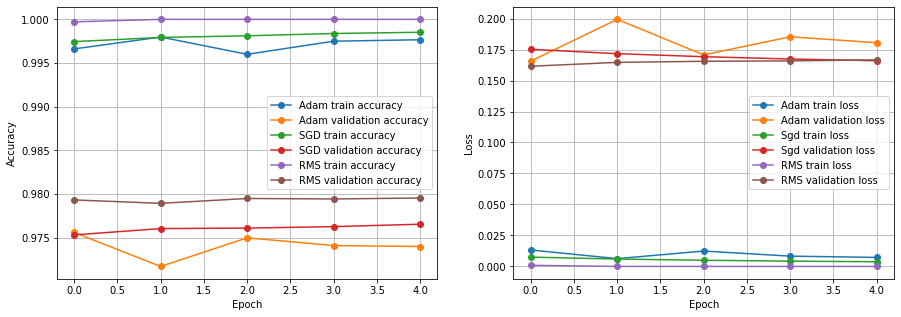

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(adam_acc, 'o-', label='Adam train accuracy')
plt.plot(adam_val_acc, 'o-', label = 'Adam validation accuracy')
plt.plot(sgd_acc, 'o-', label='SGD train accuracy')
plt.plot(sgd_val_acc, 'o-', label = 'SGD validation accuracy')
plt.plot(rms_acc, 'o-', label='RMS train accuracy')
plt.plot(rms_val_acc, 'o-', label = 'RMS validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(adam_loss, 'o-', label='Adam train loss')
plt.plot(adam_val_loss, 'o-', label='Adam validation loss')
plt.plot(sgd_loss, 'o-', label='Sgd train loss')
plt.plot(sgd_val_loss, 'o-', label='Sgd validation loss')
plt.plot(rms_loss, 'o-', label='RMS train loss')
plt.plot(rms_val_loss, 'o-', label='RMS validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='best')

plt.show()